In [1]:
from tensorflow.keras.datasets import mnist

2025-04-10 22:06:16.185809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(x_train, y_class_train), (x_test, y_class_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
print("학습셋 이미지 수 : {}".format(x_train.shape[0]))
print("테스트셋 이미지 수: {}".format(x_test.shape[0]))

학습셋 이미지 수 : 60000
테스트셋 이미지 수: 10000


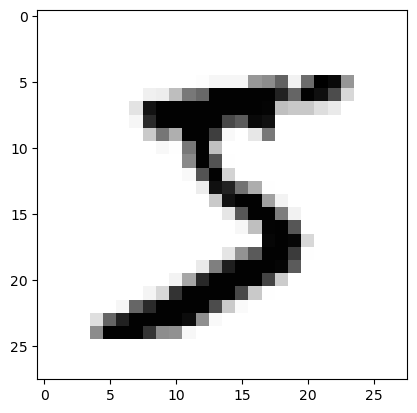

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [23]:
import sys
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [31]:
#Data Preprocessing
x_train = x_train.reshape(x_train.shape[0], 784)
x_train = x_train.astype('float64')
x_train = x_train / 255

x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255

In [35]:
print("class : %d" % (y_class_train[0]))

class : 5


In [41]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_class_train, 10)
y_test = tf.keras.utils.to_categorical(y_class_test, 10)

In [43]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [55]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

MODEL_DIR = './model_mnist_b/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/mnist/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=30, batch_size=200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])
print("test accuracy: {}".format(model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.15401, saving model to ./model/mnist/01-0.1540.keras

Epoch 2: val_loss improved from 0.15401 to 0.10446, saving model to ./model/mnist/02-0.1045.keras

Epoch 3: val_loss improved from 0.10446 to 0.08593, saving model to ./model/mnist/03-0.0859.keras

Epoch 4: val_loss improved from 0.08593 to 0.07594, saving model to ./model/mnist/04-0.0759.keras

Epoch 5: val_loss improved from 0.07594 to 0.07091, saving model to ./model/mnist/05-0.0709.keras

Epoch 6: val_loss improved from 0.07091 to 0.06851, saving model to ./model/mnist/06-0.0685.keras

Epoch 7: val_loss improved from 0.06851 to 0.06546, saving model to ./model/mnist/07-0.0655.keras

Epoch 8: val_loss improved from 0.06546 to 0.06450, saving model to ./model/mnist/08-0.0645.keras

Epoch 9: val_loss improved from 0.06450 to 0.06325, saving model to ./model/mnist/09-0.0633.keras

Epoch 10: val_loss did not improve from 0.06325

Epoch 11: val_loss did not improve from 0.06325

Epoch 12: val_

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

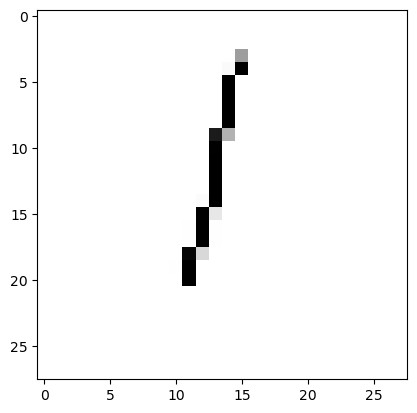

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


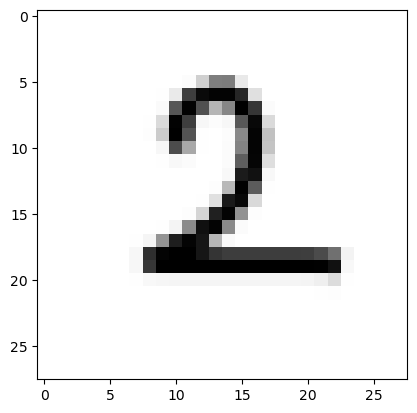

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


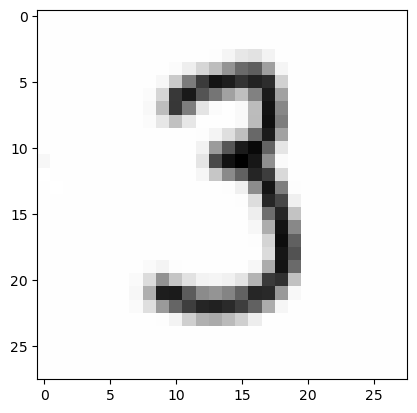

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


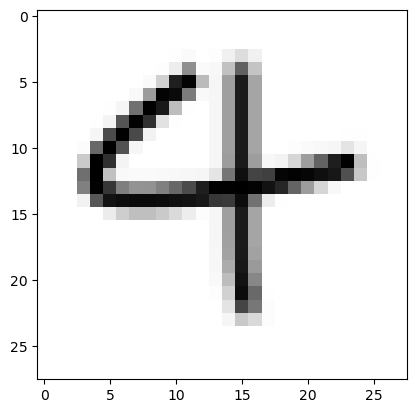

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


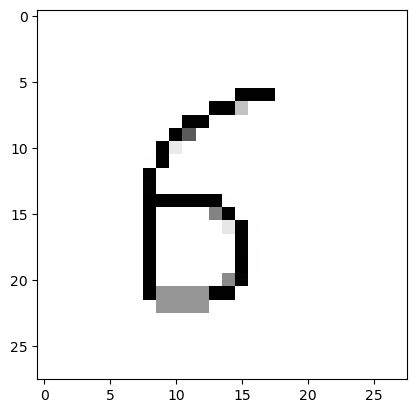

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The Answer 1 is  1
The Answer 2 is  2
The Answer 3 is  3
The Answer 4 is  8
The Answer 6 is  6


In [9]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model('./model/mnist/09-0.0633.keras')

model.summary()
test_num = []
test_predict = list()
test_num.append(cv2.imread(f'./datas/mnist/{1}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{2}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{3}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{4}.jpg'))
test_num.append(cv2.imread(f'./datas/mnist/{6}.jpg'))

for i in range(len(test_num)):
    test_num[i] = cv2.resize(test_num[i], (28, 28))
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY)
    test_num[i] = 255 - test_num[i]
    plt.imshow(test_num[i], cmap='Greys')
    plt.show()
    test_num[i] = test_num[i].reshape(1, 784).astype('float64')/255
    test_predict.append(model.predict(test_num[i]))

print('The Answer 1 is ', test_predict[0].argmax())
print('The Answer 2 is ', test_predict[1].argmax())
print('The Answer 3 is ', test_predict[2].argmax())
print('The Answer 4 is ', test_predict[3].argmax())
print('The Answer 6 is ', test_predict[4].argmax())